# IMPORTING LIBRARIES

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
GrocerySuperMart=pd.read_csv("C:/Users/kola pc/Desktop/Supermart Grocery Sales - Retail Analytics Dataset.csv",index_col="Order ID")

In [48]:
GrocerySuperMart

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Order ID,,,,,,,,,,
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu


In [49]:
# Checking out the columns
GrocerySuperMart.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Order Date',
       'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [50]:
# Checking the Column types of Data
GrocerySuperMart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, OD1 to OD9994
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
 9   State          9994 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 858.9+ KB


In [51]:
 # Changing the "ORDER DATE" Colunmn to a date
GrocerySuperMart["Order Date"]=pd.to_datetime(GrocerySuperMart["Order Date"])

In [52]:
# Creating a new column to extract Day Name
GrocerySuperMart["Day_Name"]=GrocerySuperMart["Order Date"].dt.day_name()

In [53]:
# Getting our sales per day
DaySales=GrocerySuperMart.groupby("Day_Name")["Sales"].sum()
DaySales

Day_Name
Friday       1638367
Monday       2428324
Saturday     2724409
Sunday       2615647
Thursday      807635
Tuesday      2855751
Wednesday    1886849
Name: Sales, dtype: int64

In [54]:
# Assigning Variables to the sales per day to plot our chart
Name=DaySales.index
Number=DaySales.values

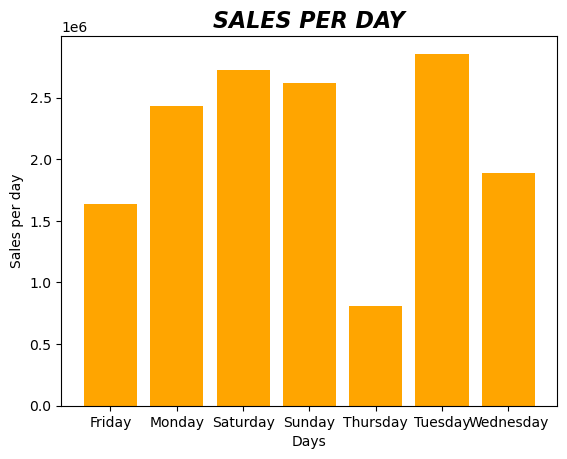

In [72]:
#Plotting our sales per day chart
plt.bar(Name,Number,color="orange")
plt.title("SALES PER DAY",fontsize=16,fontweight="bold",fontstyle="italic")
plt.xlabel("Days")
plt.ylabel("Sales per day")
plt.savefig("SALES PER DAY.png")
plt.show()

In [56]:
# Getting the Top5 Sales
Top5=GrocerySuperMart.sort_values("Sales",ascending=False).head(5)
Top5

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name
Order ID,,,,,,,,,,,
OD9852,Sundar,Beverages,Health Drinks,Cumbum,2018-10-12,Central,2500,0.25,325.0,Tamil Nadu,Friday
OD8250,Komal,Bakery,Cakes,Trichy,2016-07-31,South,2500,0.13,225.0,Tamil Nadu,Sunday
OD1413,Peer,Fruits & Veggies,Organic Vegetables,Kanyakumari,2015-12-12,West,2500,0.14,1025.0,Tamil Nadu,Saturday
OD9973,Vinne,Snacks,Chocolates,Perambalur,2018-02-20,West,2500,0.19,325.0,Tamil Nadu,Tuesday
OD2444,Ravi,Snacks,Chocolates,Dindigul,2018-10-30,Central,2500,0.33,300.0,Tamil Nadu,Tuesday


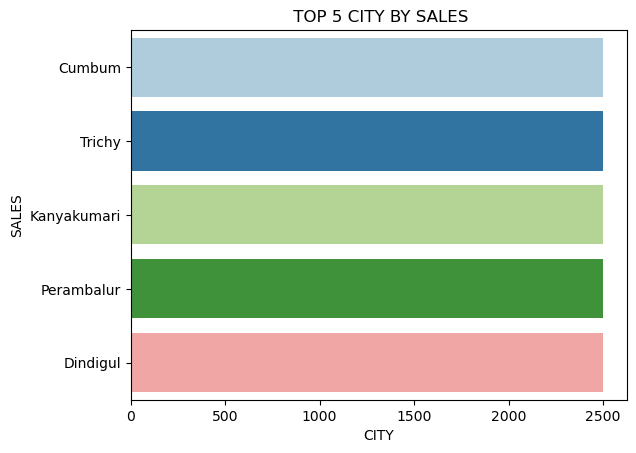

In [73]:
# Plotting Sales by city chart with "SEABORN"
sns.barplot(y=Top5["City"],x=Top5["Sales"], data=Top5,palette="Paired")
plt.title(" TOP 5 CITY BY SALES")
plt.xlabel("CITY") #Violin Plot
plt.ylabel("SALES")
plt.savefig("TOP 5 CITY BY SALES.png")
plt.show()

In [58]:
# Getting the Top10 customer with the highest sales
Top10=GrocerySuperMart.sort_values("Profit",ascending=False).head(10)
Top10


,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Day_Name
Order ID,,,,,,,,,,,
OD3160,Haseena,Bakery,Cakes,Cumbum,2017-09-04,Central,2491,0.26,1120.95,Tamil Nadu,Monday
OD3468,Verma,Fruits & Veggies,Fresh Fruits,Theni,2015-02-16,Central,2490,0.24,1120.50,Tamil Nadu,Monday
OD3437,Yadav,Bakery,Breads & Buns,Theni,2015-12-16,Central,2469,0.29,1111.05,Tamil Nadu,Wednesday
OD8135,Aditi,Bakery,Biscuits,Coimbatore,2016-09-18,East,2452,0.18,1103.40,Tamil Nadu,Sunday
OD9783,Komal,Snacks,Cookies,Karur,2017-03-29,Central,2450,0.21,1102.50,Tamil Nadu,Wednesday
OD1116,Vinne,"Eggs, Meat & Fish",Chicken,Madurai,2017-07-04,West,2439,0.30,1097.55,Tamil Nadu,Tuesday
OD4944,Willams,Beverages,Soft Drinks,Ramanadhapuram,2018-11-21,Central,2434,0.29,1095.30,Tamil Nadu,Wednesday
OD1305,Akash,Fruits & Veggies,Organic Vegetables,Salem,2017-12-01,East,2432,0.34,1094.40,Tamil Nadu,Friday
OD1808,Esther,Bakery,Biscuits,Trichy,2018-11-21,West,2429,0.11,1093.05,Tamil Nadu,Wednesday


In [59]:
# Grouping Customers by their profits
CustomerSales=Top10.groupby("Customer Name")["Profit"].sum()
CustomerSales

Customer Name
Aditi      1103.40
Akash      1094.40
Esther     1093.05
Haseena    1120.95
Komal      1102.50
Sabeela    1090.32
Verma      1120.50
Vinne      1097.55
Willams    1095.30
Yadav      1111.05
Name: Profit, dtype: float64

In [60]:
# Assigning Variables to the sales per day
Name1=CustomerSales.index
Number1=CustomerSales.values

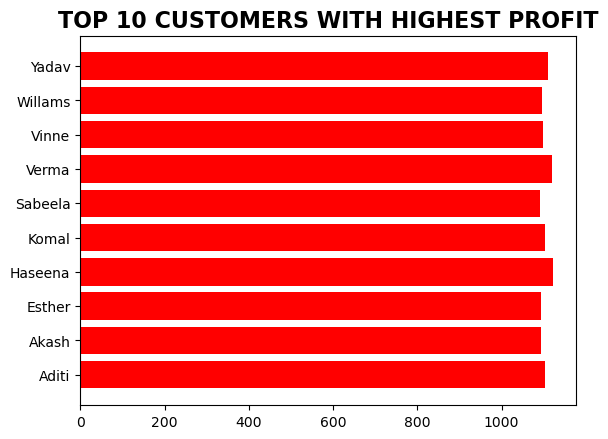

In [74]:
# Plotting the chart for customers with the highest profit of Top(10)
plt.barh(Name1,Number1,color="Red")
plt.title("TOP 10 CUSTOMERS WITH HIGHEST PROFIT",fontsize=16,fontweight="bold",c="Black")
plt.savefig("TOP 10 CUSTOMERS WITH THE HIGHEST PROFIT.png")
plt.show()

In [62]:
#Creating a new column to split the year
GrocerySuperMart["Year"]=GrocerySuperMart["Order Date"].dt.year

In [63]:
#Getting the sales per year
Year=GrocerySuperMart.groupby("Year")["Sales"].sum()
Year

Year
2015    2975599
2016    3131959
2017    3871912
2018    4977512
Name: Sales, dtype: int64

In [64]:
#Assigning a Variable to plot a chart
Name3=Year.index
Number3=Year.values

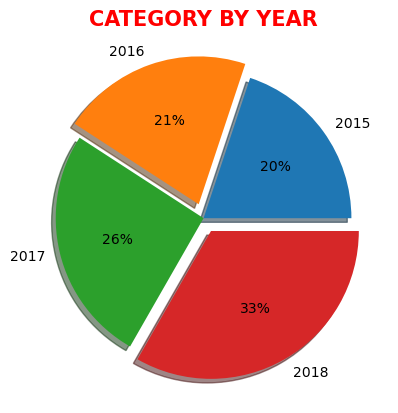

In [75]:
# Plotting a pie chart for the category per year
plt.pie(Number3,labels=Name3,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0,0.1])
plt.title("CATEGORY BY YEAR",fontsize=15,fontweight="bold",c="Red")
plt.savefig("CATEGORY BY YEAR.png")
plt.show()

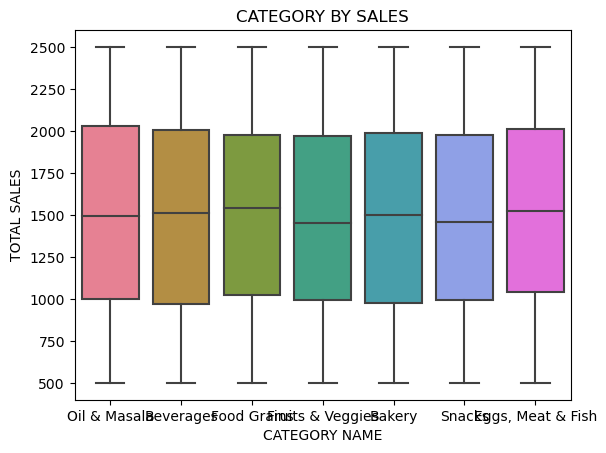

In [76]:
# Plotting the chart category by sales with the use of SEABORN
sns.boxplot(x=GrocerySuperMart["Category"],y=GrocerySuperMart["Sales"], data=GrocerySuperMart,palette="husl",color="Green")
plt.title("CATEGORY BY SALES")
plt.xlabel("CATEGORY NAME")
plt.ylabel("TOTAL SALES")
plt.savefig("CATEGORY BY SALES.png")
plt.show()

In [67]:
# Grouping Region by their profits
Region=GrocerySuperMart.groupby("Region")["Discount"].sum()
Region

Region
Central    531.33
East       648.41
North        0.12
South      367.15
West       719.80
Name: Discount, dtype: float64

In [68]:
# Assigning a variable to a chart
Name4=Region.index
Number4=Region.values

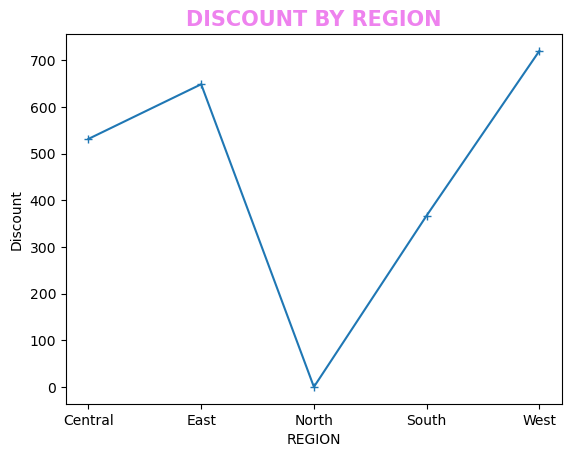

In [78]:
#Plotting a line chart  for discount by region 
plt.plot(Name4,Number4,marker="+")
plt.title("DISCOUNT BY REGION",fontsize=15,fontweight="bold",c="violet")
plt.xlabel("REGION")
plt.ylabel("Discount")
plt.savefig("DisReg.png")
plt.show()

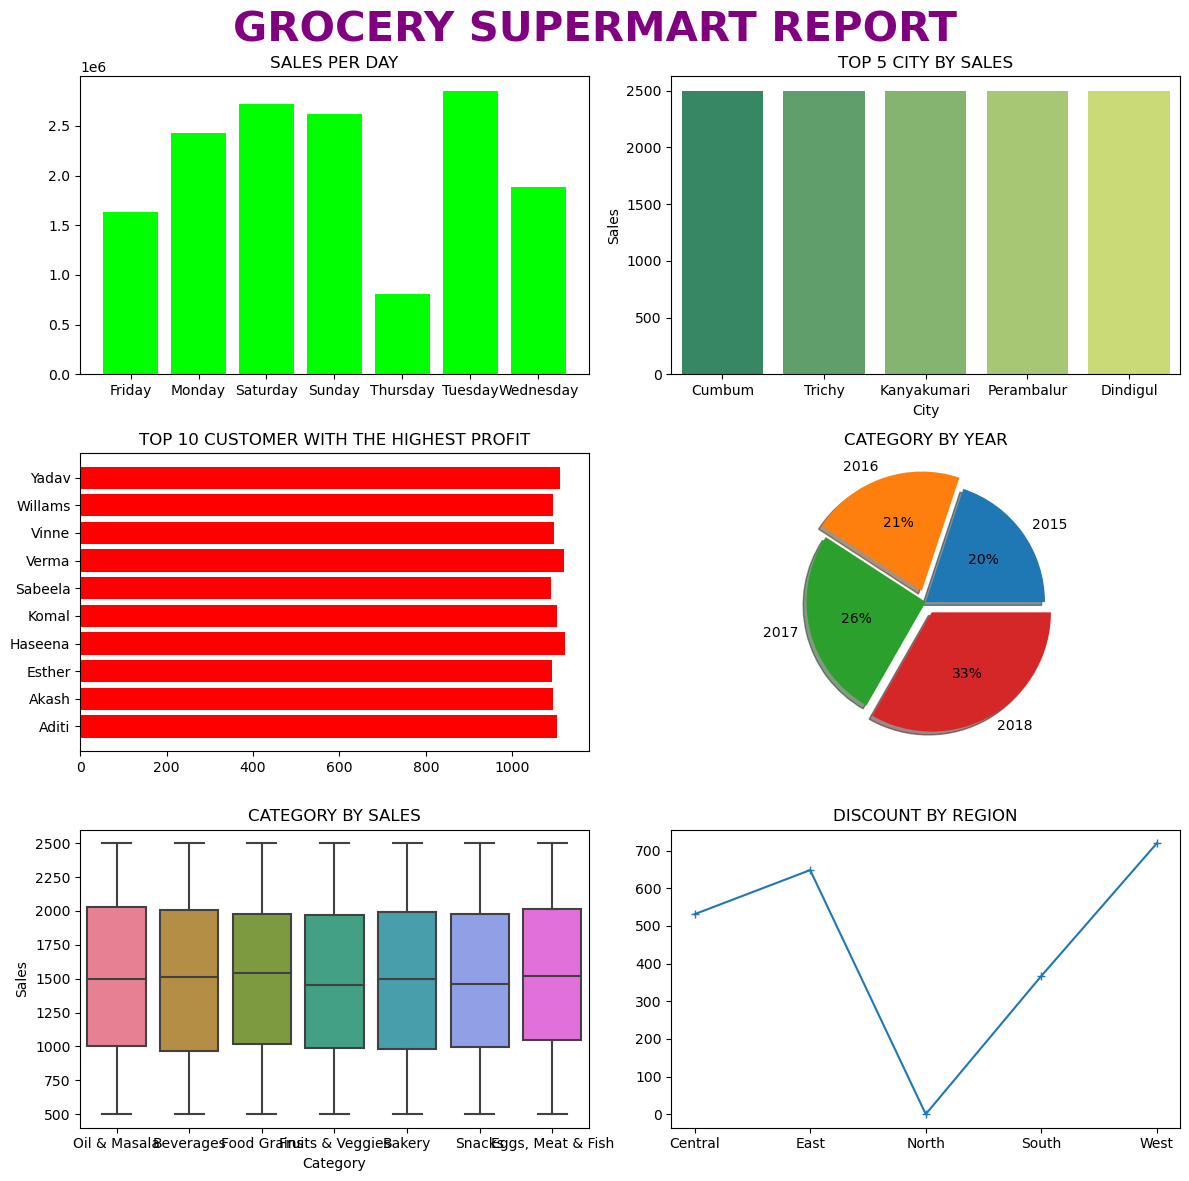

In [77]:
# Plotting the chart in a Subplots
fig,GrocerySuperMart1=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
fig.suptitle("GROCERY SUPERMART REPORT",fontweight="bold",c="#800080",fontsize=30)
GrocerySuperMart1[0,0].bar(Name,Number,color="lime")
sns.barplot(x=Top5["City"],y=Top5["Sales"],data=Top5,palette="summer",ax=GrocerySuperMart1[0,1])
GrocerySuperMart1[1,0].barh(Name1,Number1,color="Red")
GrocerySuperMart1[1,1].pie(Number3,labels=Name3,autopct="%1.0f%%",shadow=True,explode=[0,0.1,0,0.1])
sns.boxplot(x=GrocerySuperMart["Category"],y=GrocerySuperMart["Sales"],data=GrocerySuperMart,palette="husl",ax=GrocerySuperMart1[2,0])
GrocerySuperMart1[2,1].plot(Name4,Number4,marker="+")
GrocerySuperMart1[0,0].set(title="SALES PER DAY")
GrocerySuperMart1[0,1].set(title="TOP 5 CITY BY SALES")
GrocerySuperMart1[1,0].set(title="TOP 10 CUSTOMER WITH THE HIGHEST PROFIT")
GrocerySuperMart1[1,1].set(title="CATEGORY BY YEAR")
GrocerySuperMart1[2,0].set(title="CATEGORY BY SALES")
GrocerySuperMart1[2,1].set(title="DISCOUNT BY REGION")
plt.tight_layout()
plt.savefig("CATEGORY SUPERMART REPORT.png")
plt.show()